### First, the libraries i'm gonna use in this project

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [202]:
# reading the dataset of dating and marriage subreddits - generated in 'scraping'
date_marry = pd.read_csv('output/marriage_dating.csv')
date_marry.drop(columns = 'Unnamed: 0', inplace = True)

In [203]:
date_marry.head()

,title,self_text,subreddit
0,What does it mean when a girl says I don’t fee...,I had a date yesterday and I thought it was ok...,dating
1,why do some guys get hurt/bothered if you slee...,My ex recently found out I hooked up with some...,dating
2,Worst era to ever date in as a guy.,Is there a single (attractive) young woman (ea...,dating
3,"Why do some men hate ""Vanilla women""?","Hiya. Earlier today I got called a ""vanilla wo...",dating
4,Guys the Victim mentality WONT help you,I've been couple of years in this sub and that...,dating


In [204]:
date_marry.isna().sum()

title        0
self_text    0
subreddit    0
dtype: int64

In [205]:
# Changing subreddit column to numeric
# 'dating' is 1, 'marriage' is 0
date_marry['subreddit'] = (date_marry['subreddit']=='dating')*1

In [206]:
date_marry.head()

,title,self_text,subreddit
0,What does it mean when a girl says I don’t fee...,I had a date yesterday and I thought it was ok...,1
1,why do some guys get hurt/bothered if you slee...,My ex recently found out I hooked up with some...,1
2,Worst era to ever date in as a guy.,Is there a single (attractive) young woman (ea...,1
3,"Why do some men hate ""Vanilla women""?","Hiya. Earlier today I got called a ""vanilla wo...",1
4,Guys the Victim mentality WONT help you,I've been couple of years in this sub and that...,1


In [207]:
# Checking the size of the dataset
date_marry.shape

(7658, 3)

In [208]:
# Checking if there are duplicates
date_marry.drop_duplicates(inplace=True)
date_marry.shape

(7658, 3)

In [209]:
# Checking the baseline of the dataset
date_marry['subreddit'].value_counts(normalize=True)

1    0.599373
0    0.400627
Name: subreddit, dtype: float64

### First, 

### Analyzing some specific words

In [210]:
husband = date_marry['title'].str.lower().str.contains('husband')
wife = date_marry['title'].str.lower().str.contains('wife')
wedding = date_marry['title'].str.lower().str.contains('wedding')
marry = date_marry['title'].str.lower().str.contains('marry')
date_marry['marriage_keywords'] = (husband | wife | wedding | marry)
date_marry['marriage_keywords'] = date_marry['marriage_keywords'].astype(int)

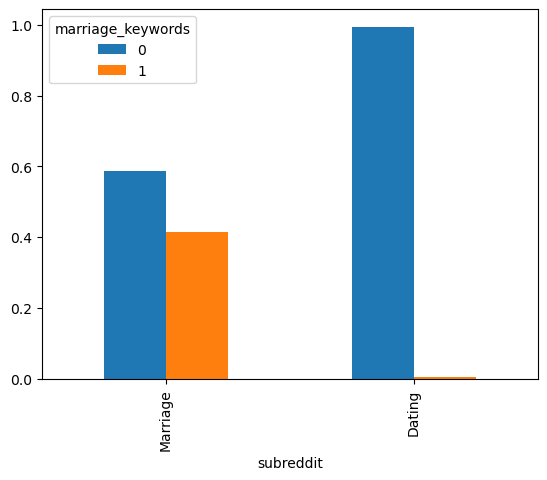

In [211]:
date_marry.groupby('subreddit')['marriage_keywords'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar')
plt.xticks([0, 1], ['Marriage', 'Dating']);


From the graph above, it is possible to see that aproximately 40% of marriage subreddits have "husband", "wife", "wedding" or "marry" in the title, while almost 100% of the dating's subreddit titles do not mention these words. This could facilitate a lot the model to predict from which subreddit the post came from... first, let's see how the model performs. If it's too easy, maybe i'll make it more challenging by removing words that are too specific of the subreddits ;)

In [212]:
boyfriend = date_marry['title'].str.lower().str.contains('boyfriend')
girlfriend = date_marry['title'].str.lower().str.contains('girlfriend')
bf = date_marry['title'].str.lower().str.contains('bf')
gf = date_marry['title'].str.lower().str.contains('gf')
date_marry['dating_keywords'] = (boyfriend | girlfriend | bf | gf)
date_marry['dating_keywords'] = date_marry['dating_keywords'].astype(int)

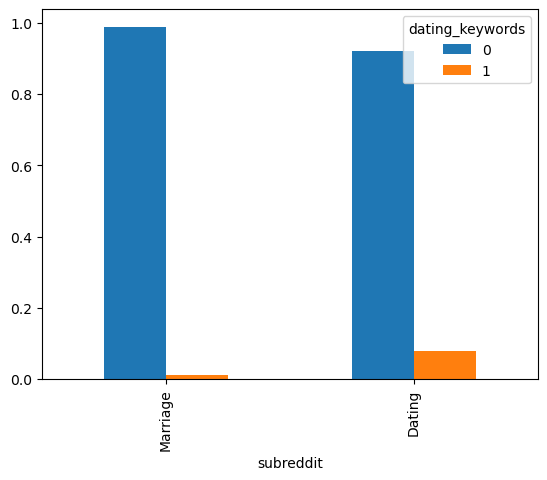

In [213]:
date_marry.groupby('subreddit')['dating_keywords'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar')
plt.xticks([0, 1], ['Marriage', 'Dating']);

> # Most common words in marriage and dating

## With stop words

In [230]:
# Redefine training and testing sets.
X = date_marry[date_marry['subreddit']==0]['self_text']
y = date_marry['subreddit']
cvec = CountVectorizer()

In [231]:
X = cvec.fit_transform(X)

Text(0.5, 1.0, 'Marriage most common words')

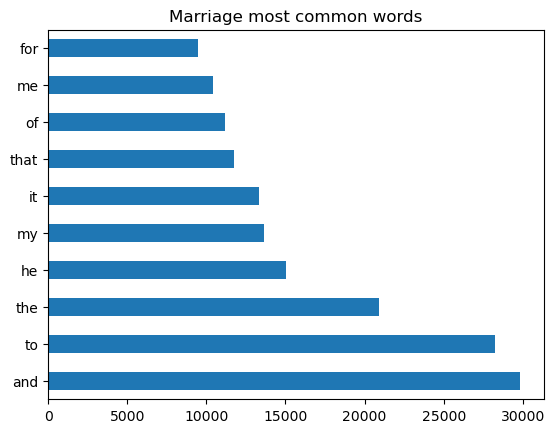

In [232]:
X_df = pd.DataFrame(X.todense(), columns = cvec.get_feature_names_out())
X_df.sum().sort_values(ascending=False)[:10].plot(kind='barh')
plt.title('Marriage most common words')

Dating most common words

In [233]:
# Redefine training and testing sets.
X = date_marry[date_marry['subreddit']==1]['self_text']
y = date_marry['subreddit']
cvec = CountVectorizer()

In [234]:
X = cvec.fit_transform(X)

Text(0.5, 1.0, 'Dating most common words')

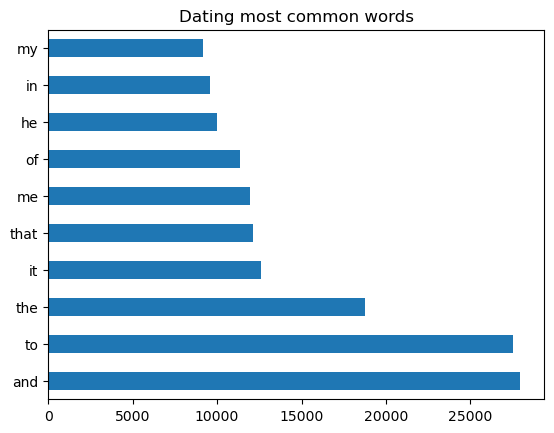

In [235]:
X_df = pd.DataFrame(X.todense(), columns = cvec.get_feature_names_out())
X_df.sum().sort_values(ascending=False)[:10].plot(kind='barh')
plt.title('Dating most common words')

## Without stop words

In [236]:
# Redefine training and testing sets.
X = date_marry[date_marry['subreddit']==0]['self_text']
y = date_marry['subreddit']
cvec = CountVectorizer(stop_words='english')

In [237]:
X = cvec.fit_transform(X)

Text(0.5, 1.0, 'Marriage most common words')

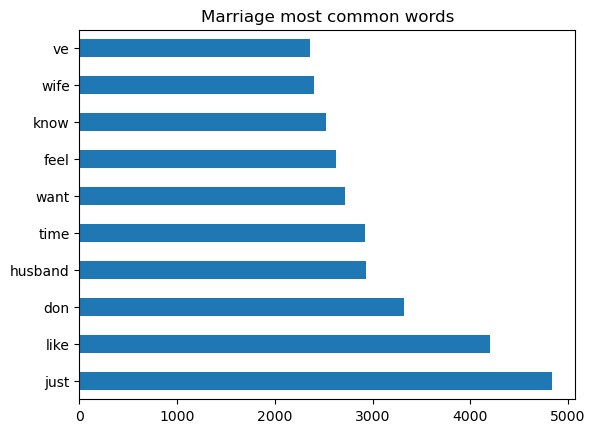

In [238]:
X_df = pd.DataFrame(X.todense(), columns = cvec.get_feature_names_out())
X_df.sum().sort_values(ascending=False)[:10].plot(kind='barh')
plt.title('Marriage most common words')

In [ ]:
date_marry['self_text']

In [239]:
# Redefine training and testing sets.
X = date_marry[date_marry['subreddit']==1]['self_text']
y = date_marry['subreddit']
cvec = CountVectorizer(stop_words='english')

In [240]:
X = cvec.fit_transform(X)

Text(0.5, 1.0, 'Dating most common words')

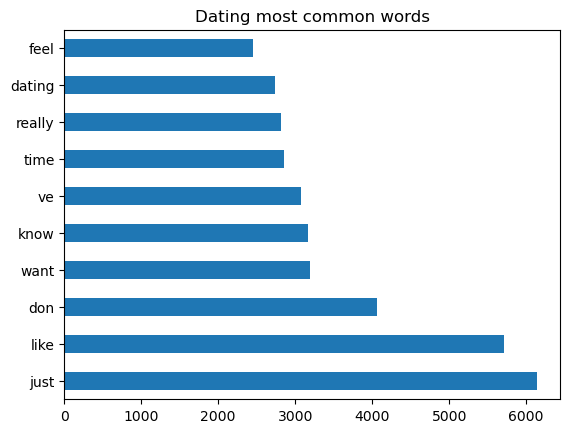

In [241]:
X_df = pd.DataFrame(X.todense(), columns = cvec.get_feature_names_out())
X_df.sum().sort_values(ascending=False)[:10].plot(kind='barh')
plt.title('Dating most common words')

# Special characters - are there differences between subreddits?

### Counting special characters and checking if there are differences between subreddits

In [214]:
# code adapted from stack overflow
# https://stackoverflow.com/questions/59687650/how-to-count-special-chars-in-column-in-pandas
date_marry["special_characters"] = date_marry["self_text"].apply(lambda x: sum(not c.isalpha() for c in x ))
date_marry["special_characters"]

0        155
1         53
2         54
3        141
4        239
        ... 
7653     111
7654    1019
7655      14
7656     516
7657     117
Name: special_characters, Length: 7658, dtype: int64

In [215]:
date_marry.groupby('subreddit')['special_characters'].describe()

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
0,3068.0,338.818123,363.127990,0.0,115.75,242.0,441.0,4660.0
1,4590.0,227.426797,236.988225,8.0,82.00,161.0,292.0,4286.0


In [216]:
most_special_characters = date_marry[date_marry["special_characters"]==4660]['self_text']
for string in most_special_characters:
    print(string)

**Final Edit I promise!** 

*Don't worry y'all, I'll be a distant part of your short-term internet memory in like 12 hours.* 

*Trigger warning- the following portion will add another 300 words or so. If you're averse to reading long things, go to Twitter.* 

For those (there were a tiny few) who enjoyed my writing or my "candor," feel free to "follow" me on Reddit. I tend to fixate on a subject on Reddit about once a month, I write 2 to 3 pages on it, and then, typically, I get a mixture of temper tantrums, 'amen brothers' in my DMs, and angry people who read the first 25 words and assume they've read it all. 

For those who insisted on calling me names, using insulting adjectives, or (my least favorite) using all the vocab they learned in Berne Brown's TED Talk to psychoanalyze me while they are angrily typing away on their phones, what do you think your purpose was? Those of us who've (not proud of this) argued with trump supporters or AOC supporters or anti-vaxxers or steelers fans

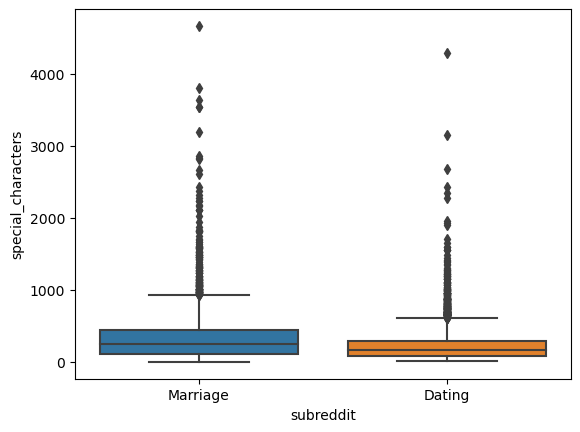

In [217]:
sns.boxplot(x="subreddit", y="special_characters",data=date_marry)
plt.xticks([0, 1], ['Marriage', 'Dating']);

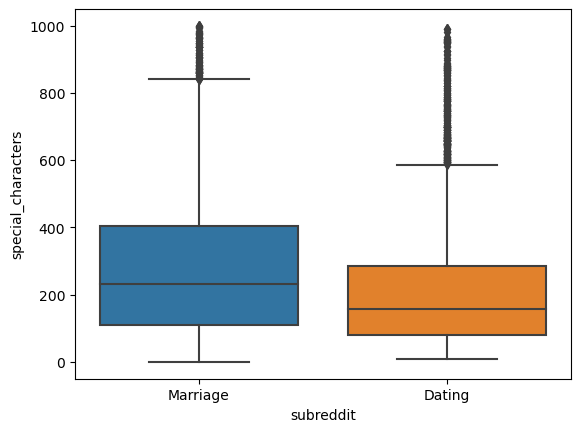

In [218]:
sns.boxplot(x="subreddit", y="special_characters",data=date_marry[date_marry['special_characters']<1000])
plt.xticks([0, 1], ['Marriage', 'Dating']);

It looks there is a difference of the number of special characters per posts between the subreddits... <br>

In [ ]:
# Most common in marriage

In [ ]:
# Most common in dating

# Removing special characters

To get the content of the message and

In [220]:
# Code adapted from chat gpt - asked for a regex to remove characters that werent letters and keep the space
date_marry['self_text'] = date_marry['self_text'].str.replace("’", "'", regex=True)
date_marry['self_text'] = date_marry['self_text'].str.replace(r'[^A-Za-z\s\']', '', regex=True)

In [221]:
date_marry['self_text']

0       I had a date yesterday and I thought it was ok...
1       My ex recently found out I hooked up with some...
2       Is there a single attractive young woman early...
3       Hiya Earlier today I got called a vanilla woma...
4       I've been couple of years in this sub and that...
                              ...                        
7653    \nWhat is the consensus when cheating happens ...
7654    I'm struggling and don't know what to do Sorry...
7655    What do you do if you husband or wife became c...
7656    I'm  a teacher who is off during the summer wh...
7657    Occasionally will take time off from work and ...
Name: self_text, Length: 7658, dtype: object

In [222]:
X = date_marry['self_text']
y = date_marry['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1906)

In [223]:
pipe_cvec = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression())    
])

In [224]:
pipe_cvec.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()), ('logreg', LogisticRegression())],
 'verbose': False,
 'cvec': CountVectorizer(),
 'logreg': LogisticRegression(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'logreg__C': 1.0,
 'logreg__class_weight': None,
 'logreg__dual': False,
 'logreg__fit_intercept': True,
 'logreg__intercept_scaling': 1,
 'logreg__l1_ratio': None,
 'logreg__max_iter': 100,
 'logreg__multi_class': 'auto',
 'logreg__n_jobs': None,
 'logreg__penalty': 'l2',
 'logreg__random_state': None,
 'logreg__solver': 'lbfgs',
 'logreg__tol':

In [225]:
pipe_cvec_params = {
    'cvec__max_features': [None, 2000, 3000, 4000, 5000],
    'cvec__stop_words': [None, "english"],
    'cvec__ngram_range': [(1, 1), (1, 2)]
}

In [226]:
gs_cvec = GridSearchCV(pipe_cvec,
                     param_grid = pipe_cvec_params,
                    cv = 5)

In [227]:
# Fit GridSearch to training data.
gs_cvec.fit(X_train, y_train)

/Users/gabrielafichtner/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gabrielafichtner/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/gabrielafichtner/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gabrielafichtner/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/gabrielafichtner/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gabrielafichtner/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/gabrielafichtner/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gabrielafichtner/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'cvec__max_features': [None, 2000, 3000, 4000, 5000],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english']})

In [228]:
# Score model on training set.
gs_cvec.score(X_train, y_train)

0.9973881246735156

In [229]:
# Score model on testing set.
gs_cvec.score(X_test, y_test)

0.9326370757180157

In [ ]:
numeric_features = ["age", "fare"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

strings_features = ["embarked", "sex", "pclass"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [ ]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

## Logistic Regression with sentiment analysis of the posts' descriptions

In [60]:
# Creating the columns with the negative, positive, neutral and compound scores
sa = SentimentIntensityAnalyzer()
date_marry['compounds'] = date_marry['self_text'].apply(lambda r: sa.polarity_scores(r)['compound'])
date_marry['neg'] = date_marry['self_text'].apply(lambda r: sa.polarity_scores(r)['neg'])
date_marry['neu'] = date_marry['self_text'].apply(lambda r: sa.polarity_scores(r)['neu'])
date_marry['pos'] = date_marry['self_text'].apply(lambda r: sa.polarity_scores(r)['pos'])

In [61]:
# Checking the new columns
date_marry[['compounds', 'neg', 'neu', 'pos']]

,compounds,neg,neu,pos
0,0.9412,0.018,0.831,0.152
1,-0.3253,0.153,0.718,0.130
2,0.4588,0.000,0.907,0.093
3,0.9722,0.016,0.770,0.213
4,-0.9372,0.173,0.730,0.097
...,...,...,...,...
7653,-0.8752,0.168,0.745,0.087
7654,-0.8495,0.091,0.826,0.083
7655,0.0000,0.000,1.000,0.000
7656,0.5287,0.031,0.942,0.027


In [62]:
# Defining X and y used to train, test split
X = date_marry[['compounds', 'neg', 'neu', 'pos']]
y = date_marry['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [63]:
# Fitting the logistic regression in the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [67]:
print(f'Training score of Logistic regression with just sentiment analysis: {logreg.score(X_train, y_train)}')
print(f'Testing score of Logistic regression with just sentiment analysis: {logreg.score(X_test, y_test)}')

Training score of Logistic regression with just sentiment analysis: 0.6045620755702594
Testing score of Logistic regression with just sentiment analysis: 0.5838120104438642


The Logistic Regression model considering only sentiment analysis got a score worse than the baseline in the test set, and it barely beats the baseline in the training set... Maybe these variables arent helpful when predicting which subreddit the post came from...

In [90]:
print(CountVectorizer(stop_words = "english").get_stop_words)

<bound method _VectorizerMixin.get_stop_words of CountVectorizer(stop_words='english')>


In [ ]:
# W